# 1. Introdução a Aprendizagem de Máquina

* Estudo de técnicas computacionais que apresentem características de aprendizagem automática. Ou seja, é um tipo de inteligência artificial que promove máquinas com a habilidade de aprender sem ser explicitamente programado.
* Essência do aprendizado de máquina: a) Existe um padrão; b) Não é possível construir um equação matemática; c) Existem dados disponíveis.
* Métodos de aprendizado:
> 1. Aprendizado supervisionado: Aprende com dados rotulados (ex.: detector de email com spams usando dados de treinamento com emails já rotulados).
> 2. Aprendizado não-supervisionado: Descobre padrões em dados não rotulados (ex.: agrupamentos de documentos similares baseados no conteúdo de texto).
> 3. Aprendizado por reforço: Aprendizado baseado em comentários e recompença (ex.: aprender a jogar xadrez ganhando ou perdendo)


* Dimensionalidade e visualização
> http://projector.tensorflow.org/
> https://pair-code.github.io/facets/

* Tipos de problema:
> 1. Classificação - supervisionada, preditiva;
> 2. Regressão - supervisionada, preditiva;
> 3. Agrupamento (*clustering*) - não-supervisionada, descritiva;
> 4. Detecção de anomalias - não-supervisionada, descritiva.

![problem types](problem-types-ml.png)

* Comparando os algoritmos (*Nearest nede classificação gráficamente
![algorithm comparison sklearn](https://scikit-learn.org/stable/_images/sphx_glr_plot_classifier_comparison_001.png)

* Competições de ciência de dados  - [Kaggle](https://www.kaggle.com/)

* Exemplo: Aprovação de crédito
> Se tem como entrada as informações do aplicante (ex.: idade, gênero, salário anual, anos com residência própia, anos no mesmo trabalho, débito atualizado, ...)

> Como saída teremos se é um bom ou mal cliente, para isso é preciso criar uma fórmula para aprovar créditos. Essa fórmula é criada baseada em dados anteriores.

* Componentes do aprendizado:

> 1. Função de interesse desconhecida: $f: X \to Y$
> 2. Exemplos de treinamento: $(x_1, y_1), ..., (x_n, y_n)$
> 3. Conjunto de hipóteses: $H$
> 4. Algoritmo de aprendizado: $A$
> 5. Hipótese final: $g \approx f$

> O conjunto de hipóteses + o algoritmo de aprendizado, juntos são referenciados como **modelo de aprendizado**

* Regiões de separação linear
Sabe-se que se formarmos uma **combinação linear de duas variáveis**, e igualá-la a um número, então os pontos no espaço bidimensional podem ser divididos em três categorias:

a) pontos **pertencentes à linha** com coordenadas tais que $w_1.x_1 + w_2.x_2 = \theta$
b) pontos **em um lado da linha** tem coordenadas tais que $w_1.x_1 + w_2.x_2 < \theta$
c) pontos **no outro lado da linha** tem coordenadas tais que $w_1.x_1 + w_2.x_2 > \theta$

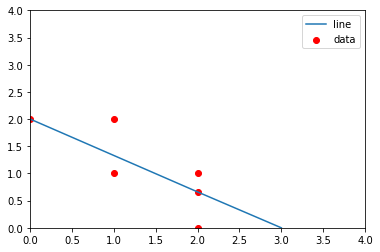

In [7]:
from matplotlib import pyplot as plt
linex = [0, 2., 3.]
liney = [2., .66, 0]
datax = [2., 2., 2., 1., 1., 0]
datay = [0, .66, 1., 1., 2., 2.]
plt.scatter(datax, datay, c='r', label='data')
plt.plot(linex, liney, label='line')
plt.xlim(0.0, 4.0)
plt.ylim(0.0, 4.0)
plt.legend()
plt.show()

| Pontos (x, y) | 2x + 3y | Posição |
|---------------|---------|---------|
| 0, 2.         | 6       | linha   |
| 1., 1.        | 5       | abaixo  |
| 1., 2.        | 8       | acima   |
| 2., 0         | 4       | abaixo  |
| 2., .66       | 6       | linha   |
| 2., 1.        | 7       | acima   |

Posição dos pontos em função da linha $2x+3y=6$ de delimitação ($\theta = 6$).
> 1. linha: $2x+3y = 6$
> 2. acima: $2x+3y > 6$
> 3. abaixo: $2x+3y < 6$

* Uma hipótese simples usando **perceptron**

Para o input $x = (x_1, ..., x_d)$ atributos do cliente, o crédito será aprovado se $\sum^{d}_{i=1}w_ix_i > limite$, se for menor negue.

Essa fórmula linear $h \in H$ pode ser escrita: $h(\mathbf{x}) = sign((\sum^{d}_{i=1}w_ix_i) - limite)$

* Exemplo

> Vantagens para separabilidade linear:

| $x$ | classe |
|---|--------|
| 0 | +1     |
| 1 | +1     |
| 2 | -1     |
| 3 | -1     |

> Como separar as duas classes com apenas um ponto?

| $x$ | classe |
|---|--------|
| 0 | +1     |
| 1 | -1     |
| 2 | -1     |
| 3 | +1     |

> Possível solução é aumentar a quantidade de dimensões (teorema de cover, 1965) 

$\Phi(x) = (x, x^2)$

| $x$ | $x^2$ | classe |
|---|-----|--------|
| 0 | 0   | +1     |
| 1 | 1   | -1     |
| 2 | 4   | -1     |
| 3 | 9   | +1     |

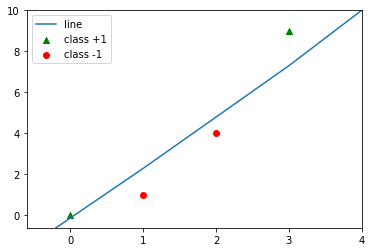

In [22]:
linex = [-.2, 1., 3., 4.]
liney = [-0.6, 2.3, 7.3, 10.]
posx = [0, 3.]
posy = [0, 9.]
negx = [1., 2.]
negy = [1., 4.]
plt.scatter(posx, posy, c='g', label='class +1', marker="^")
plt.scatter(negx, negy, c='r', label='class -1')
plt.plot(linex, liney, label='line')
plt.xlim(-0.6, 4.)
plt.ylim(-0.6, 10.)
plt.legend()
plt.show()

### Inferência indutiva

#### Indução
* Um processo de racioncínio para uma conclusão sobre todos os membros de uma classe por meio do exame de apenas uns poucos membros da classe. De maneira geral, raciocínio do particular para o geral.
* Por exemplo, se todos os pacientes com Déficit de atenção atendidos em 1986 sofriam de ansiedade, o mesmo ocorrendo em 1987, posso inferir logicamente que todos os pacientes que sofrem de déficit de atenção também sobrem de ansiedade.
* Isso pode ser verdade ou não, mas propicia uma boa generalização.
* Para um conjunto de objetos $x = {a,b,c,d,..}$ se a propriedade P é verdade para $a$, $b$ e $c$, então é verdade para todo $x$.
* O conhecimento novo baseado em vários casos (indução) é geralmente verdadeiro desde os sistemas estudados sejam bem comportados.
> Se o número de objetos (exemplos) for insuficiente, ou se não forem bem escolhidos, as hipóteses obtidas podem ser de pouco valor.

* A inferência indutiva é um dos principais métodos utilizados para derivar conhecimento novo e predizer eventos futuros.

* "Um programa aprende a partir da experiência **E**, em relação a uma classe de tarefas **T**, com medida de desempenho **P**, se seu desempenho em **T**, medido por **P**, melhora com **E**"". (*Mitchell, 1997*)
> Também chamado de **Aprendizado indutivo**.

### Exemplo (1/2) - Detecção de bons clientes para um cartão de crédito

* **Tarefa T**: classificar potenciais novos clientes como bons ou maus pagadores;
* **Medida de desempenho P**: porcentagem de clientes classificados corretamente;
* **Experiência de treinamento E**: uma base de dados histórica em que os clientes já conhecidos são previamente classificados como bons ou maus pagadores.

### Exemplo (2/2) - Reconhecimento de caracteres manuscritos

* **Tarefa T**: reconhecer e classificar caracteres manuscritos;
* **Medida de desempenho P**: percentagem de caracteres classificados corretamente;
* **Experiência de treinamento E**: base de dados de caracteres manuscritos com a respectiva classificação.

### Técnicas de AM

* Ajustam seus parâmetros em uma **fase de treinamento**
> Utiliza **conjunto** de dados de **treinamento**.

* Avalia seu desempenho para novos dados em, uma **fase de teste** (ou validação)
> 1. Utiliza **conjunto** de dado de **teste**;
> 2. Aprendizado é mais confiável quando exemplos de treinamento seguem uma **distribuição** semelhante a dos **exemplos de teste**.

### Paradigmas de AM

#### 1. Simbólico;
* Constrói representações simbólicas de um conceito através da análise de seus exemplos e contra-exemplos
* Representações simbólicas geralmente assumem a forma de:
> Expressão lógica; Árvore de decisão; Regras de produção; Rede semântica.

#### 2. Baseado em instâncias;
* Classificam novos dados utilizando dados similares cuja classe é conhecida;
* Análogo ao que fazemos para resolver novos problemas;
> Exemplo: Raciocínio baseado em casos e k-vizinhos mais próximos.
#### 3. Estatístico;
* Constrói um modelo estatístico do problema, geralmente utilizando a **regra de Bayes**
> Podem ser: paramétricos, não-paramétricos, semi-paramétricos.

#### 4. Evolucionário -  Computação evolucionária (ou evolutiva);
* Sistemas para a resolução de problemas que utilizam modelos computacionais baseados na teoria da evolução natural das espécies;
* Inclui algoritmos genéticos.

#### 5. Conexionista - Redes neurais artificiais;
* Estruturas distribuídas: Formadas por um grande número de unidades de processamento conectadas entre si

### Tipos de AM

#### 1. Aprendizado supervisionado
* O algoritmo de aprendizado (**indutor**) recebe um conjunto de classes exemplos de treinamento para os quais os rótulos da classe associada são conhecidos;
* Cada exemplo (**instância ou padrão**) é descrito por um vetor de valores (**atributos**) e pelo rótulo da classe associada;
* O objetivo do indutor é construir um classificador que possa determinar corretamente a classe de novos exemplos ainda não rotulados;
* Para rótulos de classe discretos esse problema é chamado de **classificação** e para valores contínuos como **regressão**.

#### 2. Aprendizado não-supervisionado
* O indutor analisa os exemplos fornecidos e tenta determinar se alguns deles podem ser agrupados de alguma maneira, formando **agrupamentos** ou ***clusters***
* Após a determinação dos agrupamentos, em geral, é necessário uma análise para determinar o que cada agrupamento significa no contexto problema sendo analisado.

## Conceitos e definições de aprendizado

* **Exemplo** (caso, registro ou dado): é uma tupla de valores de atributos.
> Um paciente, dados médicos sobre uma determinada doença

* **Atributo**: descreve uma característica ou um aspecto de um exemplo.
> Nominal: cor; Contínuo: peso

* **Classe** (ou **rótulo**): atributo especial (aprendizado supervisionado), denominado rótulo ou classe.
> Classificação: discreto ou nominal C1, C2, ..., Ck; Regressão: valores reais

### Escala nominal ou categórica

* Os valores são símbolos distintos que servem apenas para rotular ou identificar.
> Atributo "Sexo": masculino ou feminino; Atributo "Religião": católico, protestante, budista, ...; Atributo "Partido político": DEM, PT, PSDB, ...

* Não existem relações entre valores nominais - ordenação ou distância
> Não faz sentido o teste "masculino > feminino"

* Apenas teste de igualdade pode ser feitos
> "Sexo" = masculino

### Escala ordinal

* Os valores podem ser ordenados ou ranqueados;
* Toda subclasse pode ser comparada com uma outra em termos de uma relação da forma "maior que" ou "menor que";
> Atributo "Temperatura": quente > morno > frio (no entanto, não faz sentido "quente + frio" ou "2 * morno"

* Distinção entre nominal e ordinal não é sempre clara;
> Atributo "Tempo": ensolarado, nublado, chuvoso

### Escala intervalar

* Quantidades intervalares além de ordenadas, também possuem unidades constantes de medidas;
* Diferenças entre quaisquer dois pontos adjacentes em qualquer parte da escala são iguais;
* O ponto zero é arbitrário - soma e produto não fazem sentido;
* As escalas intervalares mais familiares são as escalas de temperatura Fahrenheit e Celsius - cada uma tem um ponto zero arbitrário e nenhum indica uma quantia nula ou ausência de temperatura (Podemos dizer que 80ºF tem o dobre de temperatura de 40ºF?).

### Escala de razão

* Difere da escala intervalar por possuir um zero absoluto;
* Todas as operações matemática são possíveis com medidas em escala de razão (números reais);
* Atributo "Distância": a distância entre um objeto e ele mesmo é zero;
* Atributo "Peso": os aparelhos usados para medir peso têm um ponto zero absoluto.

### Para que tipos específicos de atributos?

* O pesquisador deve identificar a escala de medida de cada atributo usado, de forma que dados não-métricos não sejam incorretamente usados como dados métricos e vice-versa;
> "Partido político" > PSB não faz sentido, enquanto que "Temperatura" > Frio ou "Peso" < 38 fazem

* A escala de medida é crítica ao determinar que algoritmos de aprendizado de máquina são mais aprorpiados.

## Conceitos e definições

* **Conjunto de exemplos**: um conjunto de exemplos é composto por exemplos contendo valores de atributos bem como a classe associada;

* **Classificador ou hipótese**: dado um conjunto de exemplos de treinamento, um indutor gera como saída um classificador (também denominado hipótese ou descrição de conceito) de forma que, dado um novo exemplo, ele possa predizer com a maior precisão possível sua classe.

* **Ruído**: é comum no mundo real, trabalhar com dados imperfeitos. Eles podem ser derivados do próprio processo que gerou os dados, do processo de aquisição de dados, do processo de transformação ou mesmo devido a classes rotuladas incorretamente (por exemplo, exemplos com os mesmos valores de atributos mas com classes diferentes).

* **Valores perdidos (missing values**: em geral, indicados por valores fora do escopo. Podem ser do tipo desconhecido, não registrado, irrelevante. Podem ocorrer por mau funcionamento do equipamento, mudanças da definição do experimento, incapacidade de mesuração. Eles podem significar algo, a maioria dos métodos de aprendizado não assumem isto, no entanto, este tipo de informação pode ser codificado como um valor adicional.

* **Modo de aprendizado**:
> 1. **Não incremental** (***batch***): sempre que todo o conjunto de treinamento deva estar presente para o aprendizado.
> 2. **Incremental**: o indutor apenas tenta atualizar a hipótese antiga sempre que novos exemplos são adicionados ao conjunto de treinamento.

> Taxa de erro de um classificador $h$: Compara a classe verdadeira de cada exemplo com o rótulo atribuído pelo classificador induzido.

$err(h) = \frac{1}{n} \sum^{n}_{i=1} \| y_i \neq h(x_i) \|$

* **Precisão do classificador**: complemento da taxa de erro denotado por $acc(h)$
$acc(h) = 1 - err(h)$

* **Erro de regressão**: calcula-se a distância entre o valor real com o atribuído pela hipótese induzida. Pode-se usar: erro médio quadrado ou a distância absoluta média.

$mse-err(h) = \frac{1}{n} \sum^{n}_{i=1}(y_i - h(x_i))^2$

$mad-err(h) = \frac{1}{n} \sum^{n}_{i=1}|y_i - h(x_i)|$

